In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)
import matplotlib.pyplot as plt
import multiprocessing as mp

In [2]:
data_path = "../data/"
file_paths = sorted([data_path+i for i in os.listdir(data_path) if ".csv" in i])
file_paths

['../data/Data_Demo_Uncrambl - 1.csv',
 '../data/Data_Demo_Uncrambl - 10.csv',
 '../data/Data_Demo_Uncrambl - 11.csv',
 '../data/Data_Demo_Uncrambl - 12.csv',
 '../data/Data_Demo_Uncrambl - 2.csv',
 '../data/Data_Demo_Uncrambl - 3.csv',
 '../data/Data_Demo_Uncrambl - 4.csv',
 '../data/Data_Demo_Uncrambl - 5.csv',
 '../data/Data_Demo_Uncrambl - 6.csv',
 '../data/Data_Demo_Uncrambl - 7.csv',
 '../data/Data_Demo_Uncrambl - 8.csv',
 '../data/Data_Demo_Uncrambl - 9.csv']

In [3]:
#load the data
df_raw = pd.concat([pd.read_csv(i) for i in file_paths])\
       .reset_index(drop=True)
print(df_raw.shape)

/home/paul/anaconda3/envs/py2env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,9,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(67388, 34)


In [4]:
df = df_raw.copy()

# make the datetime columns to datetime format
df["GRN Date"] = pd.to_datetime(df["GRN Date"])
df["NEED_BY_DATE"] = pd.to_datetime(df["NEED_BY_DATE"])
df["PO Creation Date"] = pd.to_datetime(df["PO Creation Date"])
df["PO approval Date"] = pd.to_datetime(df["PO approval Date"])
df["GATE_ENTRY_DT"] = pd.to_datetime(df["GATE_ENTRY_DT"])
df["GATE_ENTRY_DT_Rev."] = pd.to_datetime(df["GATE_ENTRY_DT_Rev."])
df["EXCISE_INVOICE_DATE"] = pd.to_datetime(df["EXCISE_INVOICE_DATE"])


# change the datatype for numerical columns
df["QTY"] = pd.to_numeric(df["QTY"].str.replace(",", ""))
df["PO_UNIT_PRICE"] = pd.to_numeric(df["PO_UNIT_PRICE"].str.replace(",", ""))
df["VAL_IN_INR"] = pd.to_numeric(df["VAL_IN_INR"].str.replace(",", ""))
df["TAX"] = pd.to_numeric(df["TAX"].str.replace(",", ""))
df["TOT_AMT"] = pd.to_numeric(df["TOT_AMT"].str.replace(",", ""))

df.head()

,GRN No#,GRN Date,NEED_BY_DATE,ITEM,ITEM_DESC,ITEM_TYPE,ITEM_REV,DIRECT_ITEM,QTY,CORRECTION,PO_UNIT_PRICE,VAL_IN_INR,UOM,SUPPLIER,GATE_ENTRY_NO,GATE_ENTRY_DT,GATE_ENTRY_DT_Rev.,CURRENCY_CODE,CURRENCY_CONVERSION_RATE,FREIGHT_IN_INR,FRT_CURR,EXCISE_INVOICE_NO,EXCISE_INVOICE_DATE,TAX,RECORAVABLE_TAX,TOT_AMT,PO_NUM,PO_TYPE,PO Creation Date,PO approval Date,PO_REL_NUM,BUYER,AUTHORIZATION_STATUS,APPROVED_BY
0,98900077,2018-08-01,2019-03-31,AMC SERVICES,COM-AMC Apr'18-Mar'19 FOR 200KVA UPS NP15W000015,PIDE,0,NaN,1.0,NaN,160000.0,160000.0,Each,CONSUL NEOWATT POWER SOLUTIONS PRIVATE LIMITED.,S/B,2018-08-01 15:36:51,2018-08-01,INR,1.0,0,NaN,1840130080,2018-06-08,28800.0,"28,800.00",160000.0,9110681,STANDARD,2018-05-29,2018-06-04,NaN,MGN,APPROVED,VS
1,98900077,2018-08-01,2019-03-31,AMC SERVICES,COM-AMC Apr'18-Mar'19 COM-AMC FOR 100KVA SCVS ...,PIDE,0,NaN,1.0,NaN,18000.0,18000.0,Each,CONSUL NEOWATT POWER SOLUTIONS PRIVATE LIMITED.,S/B,2018-08-01 15:36:51,2018-08-01,INR,1.0,0,NaN,1840130080,2018-06-08,3240.0,"3,240.00",18000.0,9110681,STANDARD,2018-05-29,2018-06-04,NaN,MGN,APPROVED,VS
2,98900077,2018-08-01,2019-03-31,AMC SERVICES,COM-AMC Apr'18-Mar'19 COM-AMC FOR 100KVA SCVS ...,PIDE,0,NaN,1.0,NaN,18000.0,18000.0,Each,CONSUL NEOWATT POWER SOLUTIONS PRIVATE LIMITED.,S/B,2018-08-01 15:36:51,2018-08-01,INR,1.0,0,NaN,1840130080,2018-06-08,3240.0,"3,240.00",18000.0,9110681,STANDARD,2018-05-29,2018-06-04,NaN,MGN,APPROVED,VS
3,98900077,2018-08-01,2019-03-31,AMC SERVICES,COM-AMC Apr'18-Mar'19 COM-AMC FOR 100KVA SCVS ...,PIDE,0,NaN,1.0,NaN,18000.0,18000.0,Each,CONSUL NEOWATT POWER SOLUTIONS PRIVATE LIMITED.,S/B,2018-08-01 15:36:51,2018-08-01,INR,1.0,0,NaN,1840130080,2018-06-08,3240.0,"3,240.00",18000.0,9110681,STANDARD,2018-05-29,2018-06-04,NaN,MGN,APPROVED,VS
4,98900077,2018-08-01,2019-03-31,AMC SERVICES,COM-AMC Apr'18-Mar'19 COM-AMC FOR 100KVA SCVS ...,PIDE,0,NaN,1.0,NaN,18000.0,18000.0,Each,CONSUL NEOWATT POWER SOLUTIONS PRIVATE LIMITED.,S/B,2018-08-01 15:36:51,2018-08-01,INR,1.0,0,NaN,1840130080,2018-06-08,3240.0,"3,240.00",18000.0,9110681,STANDARD,2018-05-29,2018-06-04,NaN,MGN,APPROVED,VS


1. Same item procured at different rate in same PO (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM”)
2. Same item procured at different rate in different PO created on same date and same vendor irrespective of creator and approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)
3. Same item procured at different rate in different PO created on same date and same vendor by Same creator (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER”)
4. Same item procured at different rate in different PO created on same date and same vendor by Same creator and same approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER” and Column AH “APPROVED_BY”)
5. Same item procured at different rate in different PO created on same date and different vendor (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)
6. Same item procured at different rate in different PO approved on same date (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AD “PO approval Date” and Column N “SUPPLIER”)
7. Item procured through standard PO created at higher rate than open blanket PO at lower rate. (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AB “PO_TYPE” and Column N “SUPPLIER”)
8. Variances in GRN date and Gate entry date – Trend of Long delay in making GRNs (Refer Column Q “GATE_ENTRY_DT”  and Column B “GRN Date” and Column N “SUPPLIER”)
9. Trend of PO Regularisation – Invoice date post PO creation date (Refer Column W “EXCISE_INVOICE_DATE”  and Column AC “PO Creation Date” and Column N “SUPPLIER”)
10. Variances in Gate entry date and Invoice date – Trend of Long delay inwards of material (Refer Column Q “GATE_ENTRY_DT”  and Column W “EXCISE_INVOICE_DATE”  and Column N “SUPPLIER”)
11. Duplicate GRN for same invoices (Refer Column B “GRN Date” and Column W “EXCISE_INVOICE_DATE” and Column N “SUPPLIER”)
12. Blanket and Standard PO created and approved on Same date to same supplier for same item (Refer Column D “ITEM” and Column AB “PO_TYPE” and Column N “SUPPLIER” and Column AC “PO Creation Date”)

#### Definition of Terms
1. GRN - Goods Receipt Note
2. PO - Purchase Order

### 1. Same item procured at different rate in same PO (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM”)

In [5]:
df1 = df.groupby(["ITEM", "PO_NUM"])\
        .apply(lambda x: pd.Series([x["PO_UNIT_PRICE"].values],
                                   index=["PO_UNIT_PRICE"]))
df1_bool = df1["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1)
df1 = df1[df1_bool]
print(df1.shape)


#get the unique PO_UNIT_PRICE
df1 = pd.DataFrame(df1["PO_UNIT_PRICE"].apply(lambda x: np.unique(x)))
df1.head()

(1359, 1)


,,PO_UNIT_PRICE
ITEM,PO_NUM,
103076,9214741,"[5.0, 6.2]"
105238,9214741,"[4.0, 5.0]"
106168,9214741,"[20.0, 40.0]"
106175,9214741,"[5.8, 8.0, 500.0]"
1367001_R-00,9310562,"[9967.0, 10239.8]"


In [6]:
#top items with a lot of purchase orders
pd.value_counts(df1.index.get_level_values(0)).head(10)

MAINTENANCE SPARES           375
REPAIRS AND RECTIFICATION    120
LOOSE TOOLS                   91
WELFARE ITEMS                 79
CUSTOMER ASSETS               66
STATIONARY                    49
BUILDING MAINT ITEMS          45
PROFESSIONAL SERVICES         40
GENERAL STORES OTHERS         38
FLEXI STAFF                   27
Name: ITEM, dtype: int64

count    1359.000000
mean        4.218543
std         4.098932
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        37.000000
Name: PO_UNIT_PRICE, dtype: float64


Text(0,0.5,'Counts')

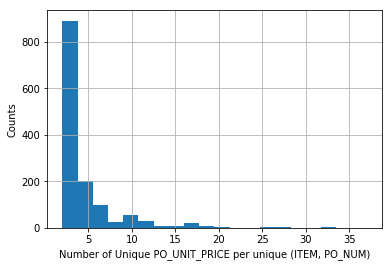

In [7]:
#descriptives 
df1_num_unique = df1["PO_UNIT_PRICE"].apply(lambda x: len(x))
print(df1_num_unique.describe())
df1_num_unique.hist(bins=20)
plt.xlabel("Number of Unique PO_UNIT_PRICE per unique (ITEM, PO_NUM)")
plt.ylabel("Counts")

                                                                PO_UNIT_PRICE
ITEM               PO_NUM                                                    
MAINTENANCE SPARES 9111303  [99.0, 120.0, 121.0, 144.0, 162.0, 167.0, 169....
Number of Unique PO_UNIT_PRICE for this item: 37


Text(0,0.5,'Count')

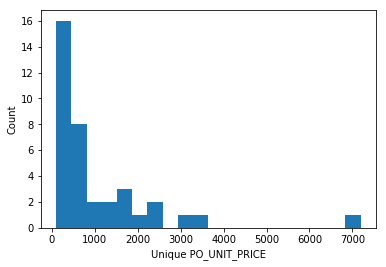

In [8]:
#let's look at the item with the most varied PO_UNIT_PRICE
item_max = df1[df1_num_unique==max(df1_num_unique)]
print(item_max)
print("Number of Unique PO_UNIT_PRICE for this item: %d"%(max(df1_num_unique)))
_ = plt.hist(item_max["PO_UNIT_PRICE"][0], bins=20)
plt.xlabel("Unique PO_UNIT_PRICE")
plt.ylabel("Count")

### 2. Same item procured at different rate in different PO created on same date and same vendor irrespective of creator and approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)

In [9]:
df2 = df.groupby(["ITEM", "PO Creation Date", "SUPPLIER"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df2_bool = (df2["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df2["PO_NUM"].apply(lambda x: len(np.unique(x))>1))
df2 = df2[df2_bool]

#drop duplicates, get the unique PO_NUM and PO_UNIT_PRICE
df2 = \
df2.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE"]))
print(df2.shape)
df2.head()

(182, 2)


,,,PO_NUM,PO_UNIT_PRICE
ITEM,PO Creation Date,SUPPLIER,,
4014022572,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[620.0, 539.0]"
4062022000,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[2221.0, 1931.0]"
4062022115,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[890.0, 774.0]"
4062022173,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[1112.0, 967.0]"
4062022204,2018-12-03,SKF INDIA LIMITED,"[9213581, 9213582]","[1574.0, 1368.0]"


### 3. Same item procured at different rate in different PO created on same date and same vendor by Same creator (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER”)

In [10]:
df3 = df.groupby(["ITEM", "PO Creation Date", "SUPPLIER", "BUYER"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df3_bool = (df3["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df3["PO_NUM"].apply(lambda x: len(np.unique(x))>1))
df3 = df3[df3_bool]

#drop duplicates 
df3 = \
df3.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE"]))
print(df3.shape)
df3.head()

(166, 2)


,,,,PO_NUM,PO_UNIT_PRICE
ITEM,PO Creation Date,SUPPLIER,BUYER,,
4014022572,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[620.0, 539.0]"
4062022000,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[2221.0, 1931.0]"
4062022115,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[890.0, 774.0]"
4062022173,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[1112.0, 967.0]"
4062022204,2018-12-03,SKF INDIA LIMITED,ANKS,"[9213581, 9213582]","[1574.0, 1368.0]"


### 4. Same item procured at different rate in different PO created on same date and same vendor by Same creator and same approver (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER” and Column AF “BUYER” and Column AH “APPROVED_BY”)

In [11]:
df4 = df.groupby(["ITEM", "PO Creation Date", "SUPPLIER", "BUYER", "APPROVED_BY"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df4_bool = (df4["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df4["PO_NUM"].apply(lambda x: len(np.unique(x))>1))
df4 = df4[df4_bool]

#drop duplicates 
df4 = \
df4.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE"]))
print(df4.shape)
df4.head()

(154, 2)


,,,,,PO_NUM,PO_UNIT_PRICE
ITEM,PO Creation Date,SUPPLIER,BUYER,APPROVED_BY,,
4014022572,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[620.0, 539.0]"
4062022000,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[2221.0, 1931.0]"
4062022115,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[890.0, 774.0]"
4062022173,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[1112.0, 967.0]"
4062022204,2018-12-03,SKF INDIA LIMITED,ANKS,BW,"[9213581, 9213582]","[1574.0, 1368.0]"


### 5. Same item procured at different rate in different PO created on same date and different vendor (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AC “PO Creation Date” and Column N “SUPPLIER”)

In [12]:
df5 = df.groupby(["ITEM", "PO Creation Date"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values,
                                    x["SUPPLIER"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df5_bool = (df5["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df5["PO_NUM"].apply(lambda x: len(np.unique(x))>1) &
            df5["SUPPLIER"].apply(lambda x: len(np.unique(x))>1))
df5 = df5[df5_bool]


#drop duplicates 
df5 = \
df5.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"]),
                               pd.Series(x["SUPPLIER"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values, x[2].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))
print(df5.shape)
df5.head()

(549, 3)


,,PO_NUM,PO_UNIT_PRICE,SUPPLIER
ITEM,PO Creation Date,,,
23045247,2019-01-10,"[9213958, 9213972]","[72.34, 0.92]","[BALAJI ENTERPRISES., TKT SALES]"
29523167-20,2018-08-22,"[9212314, 9212304]","[25000.0, 2521.0]","[JEEVA INDUSTRIES, VEE J PEE ALUMINIUM FOUNDRY..."
32X100727,2018-05-17,"[9310536, 9310534]","[385.0, 442.75]","[TEKPAK, MANAV PACKAGING PRIVATE LIMITED]"
32X100733,2018-05-17,"[9310534, 9310536]","[486.45, 400.0]","[MANAV PACKAGING PRIVATE LIMITED, TEKPAK]"
3502121210,2018-04-07,"[9210069, 9210060]","[850.0, 950.0]","[MOTION TECHNOLOGIES, BILVA TECHNOLOGIES PRIVA..."


### 6. Same item procured at different rate in different PO approved on same date (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AD “PO approval Date” and Column N “SUPPLIER”)

In [13]:
df6 = df.groupby(["ITEM", "PO approval Date"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values,
                                    x["SUPPLIER"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))

#remove those entries where there are no different PO_UNIT_PRICE and PO_NUM
df6_bool = (df6["PO_UNIT_PRICE"].apply(lambda x: len(np.unique(x))>1) &
            df6["PO_NUM"].apply(lambda x: len(np.unique(x))>1) &
            df6["SUPPLIER"].apply(lambda x: len(np.unique(x))>1))
df6 = df6[df6_bool]

#drop duplicates 
df6 = \
df6.apply(lambda x: pd.concat([pd.Series(x["PO_NUM"]), 
                               pd.Series(x["PO_UNIT_PRICE"]),
                               pd.Series(x["SUPPLIER"])], axis=1).drop_duplicates(), 
          axis=1)\
   .apply(lambda x: pd.Series([x[0].values, x[1].values, x[2].values], 
                              index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))
print(df6.shape)
df6.head()

(536, 3)


,,PO_NUM,PO_UNIT_PRICE,SUPPLIER
ITEM,PO approval Date,,,
23045247,2019-01-18,"[9213958, 9213972]","[72.34, 0.92]","[BALAJI ENTERPRISES., TKT SALES]"
32X100938,2019-01-08,"[9310535, 9312915]","[390.0, 392.0]","[TEKPAK, JAI MARUTHI INDUSTRIES]"
32X100939,2019-01-08,"[9310535, 9312915]","[472.0, 470.0]","[TEKPAK, JAI MARUTHI INDUSTRIES]"
6756041,2018-06-21,"[9211362, 9211443]","[8.5, 591.64]","[SADGURU MIDDLE EAST FZE, SETLITE ENGINEERS LI..."
6836419,2018-04-16,"[8215072, 9210029]","[250.0, 278.0]","[SRI GANESH INDUSTRIES, PEENYA FINE COMP PRIVA..."


### 7. Item procured through standard PO created at higher rate than open blanket PO at lower rate. (Refer Column D “ITEM” and Column K “PO_UNIT_PRICE” and Column AA “PO_NUM” and Column AB “PO_TYPE” and Column N “SUPPLIER”)

In [14]:
df7 = df.groupby(["ITEM", "PO_TYPE"])\
        .apply(lambda x: pd.Series([x["PO_NUM"].values,
                                    x["PO_UNIT_PRICE"].values,
                                    x["SUPPLIER"].values],
                                   index=["PO_NUM", "PO_UNIT_PRICE", "SUPPLIER"]))\
        .unstack("PO_TYPE")

#drop all items that don't have both blanket and standard PO_TYPE info
df7_bool = df7.notnull().all(axis=1)
df7 = df7[df7_bool]
print(df7.shape)
df7.head()

(649, 6)


PO_NUM                                        \
PO_TYPE                BLANKET                              STANDARD   
ITEM                                                                   
0280512500  [9112485, 9112460]  [9112011, 9111372, 9111373, 9112005]   
0286506160  [9112485, 9112460]  [9112011, 9111372, 9111373, 9112005]   
0911801120  [9112485, 9112460]  [9112011, 9111372, 9111373, 9112005]   
100011               [8210506]                             [9211601]   
100012               [8210506]                             [9211601]   

           PO_UNIT_PRICE                            \
PO_TYPE          BLANKET                  STANDARD   
ITEM                                                 
0280512500  [24.0, 24.0]  [24.0, 24.0, 24.0, 24.0]   
0286506160  [10.0, 10.0]  [10.0, 10.0, 10.0, 10.0]   
0911801120  [20.0, 20.0]  [20.0, 20.0, 20.0, 20.0]   
100011            [2.85]                     [3.6]   
100012            [3.66]                     [3.9]   

                                                SUPPLIER  \
PO_TYPE                                          BLANKET   
ITEM                                                       
0280512500  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED]   
0286506160  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED]   
0911801120  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED]   
100011                               [LAKSHMI FASTENERS]   
100012                               [LAKSHMI FASTENERS]   

                                                               
PO_TYPE                                              STANDARD  
ITEM                                                           
0280512500  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED, I...  
0286506160  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED, I...  
0911801120  [ISUZU MOTORS LIMITED, ISUZU MOTORS LIMITED, I...  
100011      [WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...  
100012      [WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...

In [15]:
#only get rows where the mean of PO_UNIT_PRICE for standard is greater than mean of PO_UNIT_PRICE for blanket
df7.columns = [i for i in df7.columns]

df7[(u'PO_UNIT_PRICE_MEAN', u'BLANKET')] = df7[(u'PO_UNIT_PRICE', u'BLANKET')].apply(lambda x: np.unique(x)).apply(lambda x: np.mean(x))
df7[(u'PO_UNIT_PRICE_MEAN', u'STANDARD')] = df7[(u'PO_UNIT_PRICE', u'STANDARD')].apply(lambda x: np.unique(x)).apply(lambda x: np.mean(x))

df7 = df7[df7[(u'PO_UNIT_PRICE_MEAN', u'BLANKET')]<df7[(u'PO_UNIT_PRICE_MEAN', u'STANDARD')]]
df7["PO_UNIT_PRICE_DIFF"] = df7[('PO_UNIT_PRICE_MEAN', 'STANDARD')] - df7[('PO_UNIT_PRICE_MEAN', 'BLANKET')]
print(df7.shape)
df7.head(10)

(171, 9)


,"(PO_NUM, BLANKET)","(PO_NUM, STANDARD)","(PO_UNIT_PRICE, BLANKET)","(PO_UNIT_PRICE, STANDARD)","(SUPPLIER, BLANKET)","(SUPPLIER, STANDARD)","(PO_UNIT_PRICE_MEAN, BLANKET)","(PO_UNIT_PRICE_MEAN, STANDARD)",PO_UNIT_PRICE_DIFF
ITEM,,,,,,,,,
100011,[8210506],[9211601],[2.85],[3.6],[LAKSHMI FASTENERS],[WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...,2.85,3.600000,0.750000
100012,[8210506],[9211601],[3.66],[3.9],[LAKSHMI FASTENERS],[WUERTH INDUSTRIAL SERVICES INDIA PRIVATE LIMI...,3.66,3.900000,0.240000
1000762-00,"[9210009, 9210009]",[9210142],"[1948.1, 1948.1]",[2445.3],"[NAETEK FERROCASTINGS PRIVATE LIMITED, NAETEK ...",[NAETEK FERROCASTINGS PRIVATE LIMITED],1948.10,2445.300000,497.200000
1002681-00,"[9210018, 9210018, 9210018, 9210018, 9210018, ...","[9210143, 9210143, 9210143, 9210143]","[2061.0, 2061.0, 2061.0, 2061.0, 2061.0, 2061....","[2127.0, 2127.0, 2127.0, 2127.0]","[BEST CAST IT LIMITED, BEST CAST IT LIMITED, B...","[BEST CAST IT LIMITED, BEST CAST IT LIMITED, B...",2061.00,2127.000000,66.000000
103321,"[9210609, 9210609, 9210609]",[9212350],"[0.02, 0.02, 0.02]",[0.48],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.02,0.480000,0.460000
103325,"[9210609, 9210609, 9210609]",[9212350],"[0.06, 0.06, 0.06]",[1.55],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.06,1.550000,1.490000
119096,"[9110949, 8110155, 8110155, 8110155, 9110949, ...","[9110809, 9110880, 9110880, 9110880]","[1.76, 1.16, 1.16, 1.16, 1.76, 1.76, 1.76, 1.7...","[2.7, 1.76, 1.76, 1.76]","[SHASHANK ENTERPRISES, KALISMA STEEL PRIVATE L...","[SAIFY TOOLS CENTRE, SHASHANK ENTERPRISES, SHA...",1.46,2.230000,0.770000
120383,"[9210609, 9210609, 9210609]",[9212350],"[0.06, 0.06, 0.06]",[0.74],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.06,0.740000,0.680000
120384,"[9210609, 9210609, 9210609]",[9212350],"[0.06, 0.06, 0.06]",[1.06],"[IMPEX INTERNATIONAL INC., IMPEX INTERNATIONAL...",[KHANWALKAR INDUSTRIES],0.06,1.060000,1.000000


count      171.000000
mean       262.777458
std       1217.684209
min          0.190000
25%          4.837500
50%         23.500000
75%        115.575000
max      13238.500000
Name: PO_UNIT_PRICE_DIFF, dtype: float64

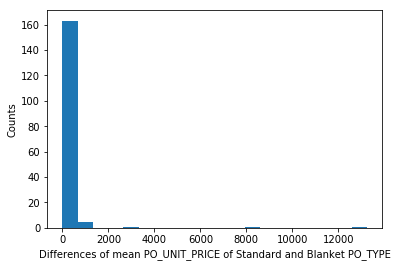

In [16]:
_ = plt.hist(df7["PO_UNIT_PRICE_DIFF"].values, bins=20)
plt.xlabel("Differences of mean PO_UNIT_PRICE of Standard and Blanket PO_TYPE")
plt.ylabel("Counts")
df7["PO_UNIT_PRICE_DIFF"].describe()

In [17]:
#take a look at the items with large difference, that is greater than the 75 percentile
df7[df7["PO_UNIT_PRICE_DIFF"]>115.575].sort_values(by="PO_UNIT_PRICE_DIFF", ascending=False)

,"(PO_NUM, BLANKET)","(PO_NUM, STANDARD)","(PO_UNIT_PRICE, BLANKET)","(PO_UNIT_PRICE, STANDARD)","(SUPPLIER, BLANKET)","(SUPPLIER, STANDARD)","(PO_UNIT_PRICE_MEAN, BLANKET)","(PO_UNIT_PRICE_MEAN, STANDARD)",PO_UNIT_PRICE_DIFF
ITEM,,,,,,,,,
29523167-20,"[9212304, 9212304, 9212304, 9212304, 9212304, ...","[9212314, 8214028, 9211112, 8214028, 8215269, ...","[2521.0, 2521.0, 2521.0, 2521.0, 2521.0, 2521....","[25000.0, 25000.0, 19500.0, 25000.0, 19500.0, ...","[VEE J PEE ALUMINIUM FOUNDRY PRIVATE LIMITED.,...","[JEEVA INDUSTRIES, JEEVA INDUSTRIES, JARAA CNC...",2261.500000,15500.000000,13238.500000
E29547630-10,"[9310116, 8310163, 9310116, 9310116, 9310116, ...","[8314045, 8314045, 8314045, 8314045, 8314045]","[29180.0, 31773.0, 29180.0, 29180.0, 29180.0, ...","[35456.0, 35456.0, 35456.0, 35456.0, 35456.0]","[PITTI CASTINGS PRIVATE LIMITED, DAKSHIN FOUND...","[PEARLITE LINERS PRIVATE LIMITED, PEARLITE LIN...",27261.794286,35456.000000,8194.205714
6884835,"[9210176, 9210176, 9210176, 9210176, 9210176, ...","[9213767, 9213767, 9213767, 9213767, 9213673]","[20.76, 20.76, 20.76, 20.76, 20.76, 20.76, 20....","[6375.0, 6375.0, 6375.0, 6375.0, 36.78]","[KOYO BEARINGS NORTH AMERICA, KOYO BEARINGS NO...","[SETLITE ENGINEERS LIMITED, SETLITE ENGINEERS ...",20.760000,3205.890000,3185.130000
6769195,"[9211339, 9211339, 9211339, 9211339, 9211339]","[9210477, 9214620, 9211451, 8215067, 9212478, ...","[779.0, 779.0, 779.0, 779.0, 779.0]","[4320.38, 94.67, 4320.38, 4320.39, 779.0, 3000...","[STAR CIRCLIPS AND ENGINEERING LIMITED, STAR C...","[SETLITE ENGINEERS LIMITED, PEENYA FINE COMP P...",779.000000,2094.500000,1315.500000
6838695,[9211339],"[9210477, 8215067, 9211451]",[1125.0],"[2160.39, 2160.39, 2268.36]",[STAR CIRCLIPS AND ENGINEERING LIMITED],"[SETLITE ENGINEERS LIMITED, SETLITE ENGINEERS ...",1125.000000,2214.375000,1089.375000
6759491-10,"[9211427, 8210206, 8210206, 8210206, 8210206, ...",[9210915],"[122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0]",[1200.0],"[GALA PRECISION ENGINEERING PRIVATE LIMITED, G...",[PIANO PRESITEL],122.000000,1200.000000,1078.000000
1562021148,"[9211062, 9211062, 9212680, 8210179, 9211062]","[9210285, 9210285]","[1422.0, 1422.0, 1521.5, 1422.0, 1422.0]","[2500.0, 2500.0]","[INA BEARINGS INDIA PRIVATE LIMITED, INA BEARI...","[DURGA BEARINGS PRIVATE LIMITED(CHENNAI), DURG...",1471.750000,2500.000000,1028.250000
80001286-00,"[9210002, 9210002, 9210003, 9210003, 9210003, ...","[9213263, 9213263, 9213263, 9213263, 9213263, ...","[19571.9, 19571.9, 19734.0, 19734.0, 19734.0, ...","[20256.9, 20256.9, 20256.9, 20256.9, 20256.9, ...","[DAKSHIN FOUNDRY PRIVATE LIMITED, DAKSHIN FOUN...","[DAKSHIN FOUNDRY PRIVATE LIMITED, DAKSHIN FOUN...",19652.950000,20648.345000,995.395000
OSP-4901100006-20-30,"[9212974, 9212974, 9212974, 9212974]","[8215224, 8215224, 8215227, 9212926, 9212835, ...","[600.0, 600.0, 600.0, 600.0]","[1900.0, 1900.0, 1900.0, 600.0, 600.0, 600.0, ...","[KEERTHI ENGINEERING, KEERTHI ENGINEERING, KEE...","[KEERTHI ENGINEERING, KEERTHI ENGINEERING, KEE...",600.000000,1250.000000,650.000000


### 8. Variances in GRN date and Gate entry date – Trend of Long delay in making GRNs (Refer Column Q “GATE_ENTRY_DT” and Column B “GRN Date” and Column N “SUPPLIER”)

In [18]:
df["delay"] = (df["GRN Date"] - df["GATE_ENTRY_DT_Rev."])

In [19]:
#average delay per gate entry date and supplier
ave_delay = df.groupby(["GATE_ENTRY_DT_Rev.", "SUPPLIER"]).apply(lambda x: x["delay"].mean()).sort_index()

#take the row entries where average delay is more than 0 days
ave_delay = ave_delay[ave_delay>pd.Timedelta(0, unit="days")]

In [20]:
#plot the delays over time
daily = ave_delay.groupby(level=0).apply(lambda x: np.mean(x))
daily = daily.reindex(pd.date_range(start=min(daily.index), end=max(daily.index)))\
             .fillna(pd.Timedelta(0, unit="days"))

#what is the daily average time delay
daily.mean()

Timedelta('3 days 00:15:12.192920')

/home/paul/anaconda3/envs/py2env/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


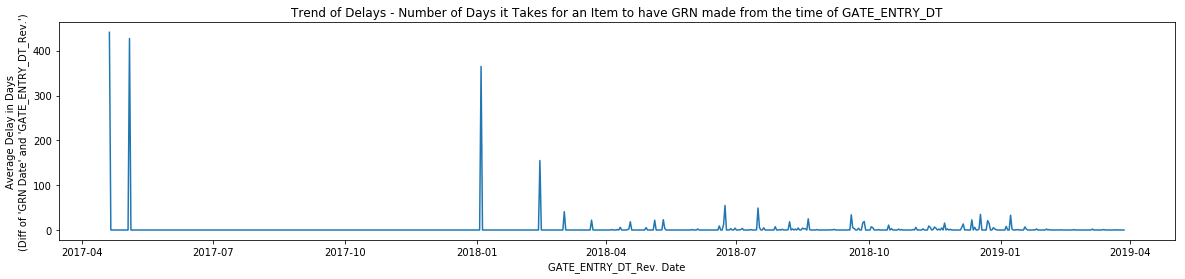

In [21]:
plt.figure(figsize=(20, 4))
plt.ylabel("Average Delay in Days\n(Diff of 'GRN Date' and 'GATE_ENTRY_DT_Rev.')")
plt.xlabel("GATE_ENTRY_DT_Rev. Date")
plt.title("Trend of Delays - Number of Days it Takes for an Item to have GRN made from the time of GATE_ENTRY_DT")
plt.plot(daily.dt.total_seconds()/60/60/24)

In [22]:
#let's look at the items with long delay, more than 20 days
morethan20daysdelay = daily[daily>pd.Timedelta(20, unit="days")]
ave_delay.loc[morethan20daysdelay.index]

GATE_ENTRY_DT_Rev.  SUPPLIER                                   
2017-04-20          FOCUS TOOLING TECHNOLOGIES                    441 days 00:00:00
2017-05-04          KOMET PRECISION TOOLS INDIA PRIVATE LIMITED   427 days 00:00:00
2018-01-04          THAYYIL ENTERPRISES                           365 days 00:00:00
2018-02-14          SKF INDIA LIMITED                             155 days 00:00:00
2018-03-03          SOUBI TOOLS                                    41 days 00:00:00
2018-03-22          SOUBI TOOLS                                    22 days 00:00:00
2018-05-05          CANARA STANDARD KEYS PRIVATE LIMITED           42 days 12:00:00
                    FORD INDIA PRIVATE LIMITED                      1 days 03:00:00
2018-05-11          THE ROLLER BEARING COMPANY (MADRAS)            23 days 00:00:00
2018-06-23          IMPERIAL AUTO INDUSTRIES LIMITED                0 days 12:00:00
                    INDO SERVICES                                 109 days 00:00:00
2018-07-16  

### 9. Trend of PO Regularisation – Invoice date post PO creation date (Refer Column W “EXCISE_INVOICE_DATE”  and Column AC “PO Creation Date” and Column N “SUPPLIER”)

In [23]:
df["delay_exciseinvoice_creationdate"] = df["EXCISE_INVOICE_DATE"] - df["PO Creation Date"]
print("Overall Average Delay:", df["delay_exciseinvoice_creationdate"].mean())
df9 = df.groupby(["PO Creation Date", "SUPPLIER"]).apply(lambda x: np.mean(x["delay_exciseinvoice_creationdate"]))
print("Average Daily Delay:", df9.mean())

('Overall Average Delay:', Timedelta('121 days 23:46:11.745711'))
('Average Daily Delay:', Timedelta('60 days 23:18:39.955372'))


In [24]:
daily_delay = df9.groupby(level="PO Creation Date").apply(lambda x: np.mean(x))
daily_delay = (daily_delay.dt.total_seconds()/60/60/24)\
                          .reindex(pd.date_range(start=min(daily_delay.index),
                                                 end=max(daily_delay.index)))\
                          .fillna(0)

Text(0.5,1,'Trend of Delays - Number of Days (EXCISE_INVOICE_DATE - PO Creation Date)')

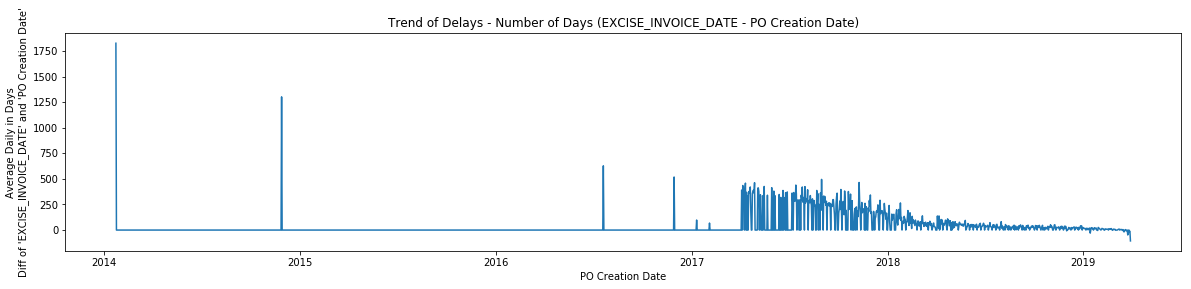

In [25]:
plt.figure(figsize=(20,4))
plt.plot(daily_delay)
plt.xlabel("PO Creation Date")
plt.ylabel("Average Daily in Days\nDiff of 'EXCISE_INVOICE_DATE' and 'PO Creation Date'")
plt.title("Trend of Delays - Number of Days (EXCISE_INVOICE_DATE - PO Creation Date)")

In [26]:
#let's look at the items with PO Creation Date before 2017 
#since those items have longer delays
df[df["PO Creation Date"].dt.year<2017]

,GRN No#,GRN Date,NEED_BY_DATE,ITEM,ITEM_DESC,ITEM_TYPE,ITEM_REV,DIRECT_ITEM,QTY,CORRECTION,PO_UNIT_PRICE,VAL_IN_INR,UOM,SUPPLIER,GATE_ENTRY_NO,GATE_ENTRY_DT,GATE_ENTRY_DT_Rev.,CURRENCY_CODE,CURRENCY_CONVERSION_RATE,FREIGHT_IN_INR,FRT_CURR,EXCISE_INVOICE_NO,EXCISE_INVOICE_DATE,TAX,RECORAVABLE_TAX,TOT_AMT,PO_NUM,PO_TYPE,PO Creation Date,PO approval Date,PO_REL_NUM,BUYER,AUTHORIZATION_STATUS,APPROVED_BY,delay,delay_exciseinvoice_creationdate
48637,99415283,2019-03-11,2014-04-30,9433392,BEARING-ROLLER,PDM,0,"7,913.00",110.0,NaN,169.00,18590.0,Each,NRB BEARINGS LIMITED,7756,2019-03-11 12:40:16,2019-03-11,INR,1.0,0.00,NaN,1171912146,2019-01-24,3346.0,"3,346.00",18590.0,101370,STANDARD,2014-01-23,2014-02-04,NaN,SSH,REQUIRES REAPPROVAL,BW,0 days,1827 days
48998,99400379,2018-04-12,2018-04-30,4509221758,"PLUG 1-1/16""-12 UNF",PDM,1,"548,273.00",446.0,NaN,48.00,21408.0,Each,SRI LAKSHMI ENGINEERING ENTERPRISES,227,2018-04-12 13:15:38,2018-04-12,INR,1.0,0.00,NaN,4047,2018-04-09,3853.0,"3,853.00",21408.0,7211154,STANDARD,2016-07-20,2018-04-12,NaN,CO,APPROVED,BW,0 days,628 days
60335,99405252,2018-07-27,2015-02-20,9422846,WASHER,PDM,A,"10,971.00",550.0,NaN,4.70,2585.0,Each,NANDA ENTERPRISES,2722,2018-07-27 15:24:52,2018-07-27,INR,1.0,0.00,NaN,915/2018,2018-07-21,465.0,465.00,2585.0,5210926,STANDARD,2014-11-28,2017-09-23,NaN,SN,APPROVED,SSG,0 days,1331 days
62572,99402202,2018-05-29,2015-02-20,6773461,LOCKING TAB,PDM,D,"9,592.00",50.0,NaN,6.67,333.5,Each,NANDA ENTERPRISES,1222,2018-05-29 10:44:48,2018-05-29,INR,1.0,0.00,NaN,444/2018,2018-05-25,60.0,60.00,333.5,5210926,STANDARD,2014-11-28,2017-09-23,NaN,SN,APPROVED,SSG,0 days,1274 days
64811,91200022,2018-05-30,2018-03-31,CAPITAL ASSETS,Design and Development of HATS System for 100...,CG,0,NaN,1.0,NaN,3900000.00,3900000.0,Each,EM ELECTRONIX PRIVATE LIMITED,1265,2018-05-30 13:06:34,2018-05-30,INR,1.0,0,NaN,217716,2018-05-02,1092000.0,"1,092,000.00",3900000.0,7510155,STANDARD,2016-11-29,2018-01-02,NaN,RSS,APPROVED,PK,0 days,519 days


(736330.0, 737242.6)

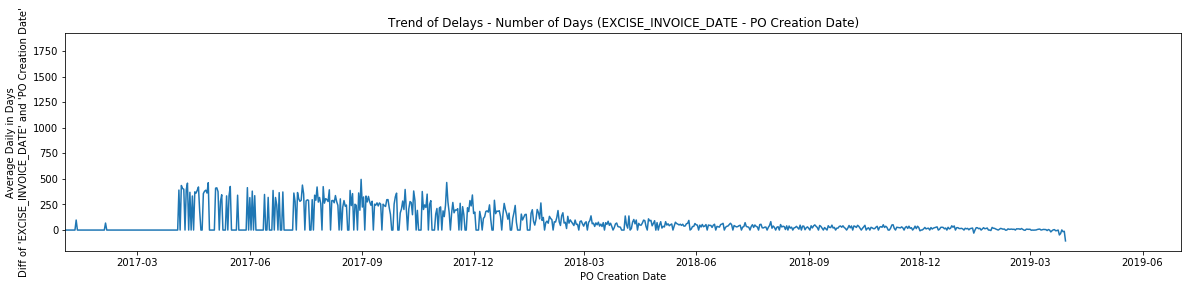

In [27]:
plt.figure(figsize=(20,4))
plt.plot(daily_delay)
plt.xlabel("PO Creation Date")
plt.ylabel("Average Daily in Days\nDiff of 'EXCISE_INVOICE_DATE' and 'PO Creation Date'")
plt.title("Trend of Delays - Number of Days (EXCISE_INVOICE_DATE - PO Creation Date)")
plt.xlim((pd.Timestamp('01-01-2017')))

In [28]:
#top 10 suppliers with the longest delay/difference of PO Creation Date and EXCISE_INVOICE_DATE
df9.sort_values(ascending=False).head(10)

PO Creation Date  SUPPLIER                                  
2014-01-23        NRB BEARINGS LIMITED                               1827 days 00:00:00
2014-11-28        NANDA ENTERPRISES                                  1302 days 12:00:00
2016-07-20        SRI LAKSHMI ENGINEERING ENTERPRISES                 628 days 00:00:00
2017-07-31        JEEVA INDUSTRIES                                    572 days 00:00:00
2017-04-06        SRI VAGESHWARI AND COMPANY                          570 days 02:24:00
2017-08-22        WENDT INDIA LIMITED                                 555 days 00:00:00
2017-04-10        METLOK PRECOAT SERVICES PRIVATE LIMITED             554 days 22:30:00
2017-04-08        GALA PRECISION ENGINEERING PRIVATE LIMITED          529 days 07:12:00
2017-04-11        FORD INDIA PRIVATE LIMITED                   529 days 06:51:25.714285
2017-04-06        SRI SATHYA ENTERPRISES                              528 days 22:30:00
dtype: timedelta64[ns]

### 10.Variances in Gate entry date and Invoice date – Trend of Long delay inwards of material (Refer Column Q “GATE_ENTRY_DT” and Column W “EXCISE_INVOICE_DATE” and Column N “SUPPLIER”)

In [29]:
#earliest and latest dates for GATE_ENTRY_DT_Rev. 
df["GATE_ENTRY_DT_Rev."].min(), df["GATE_ENTRY_DT_Rev."].max()

(Timestamp('2017-04-20 00:00:00'), Timestamp('2019-12-24 00:00:00'))

In [30]:
#earliest and latest dates for EXCISE_INVOICE_DATE
df["EXCISE_INVOICE_DATE"].min(), df["EXCISE_INVOICE_DATE"].max()

(Timestamp('1981-09-20 00:00:00'), Timestamp('2048-09-27 00:00:00'))

In [31]:
df["delay_gateentry_exciseinvoice"] = df["GATE_ENTRY_DT_Rev."] - df["EXCISE_INVOICE_DATE"]
print("Overall Average Delay:", df["delay_gateentry_exciseinvoice"].mean())
df10 = df.groupby(["EXCISE_INVOICE_DATE", "SUPPLIER"]).apply(lambda x: np.mean(x["delay_gateentry_exciseinvoice"]))
print("Average Daily Delay:", df10.mean())

('Overall Average Delay:', Timedelta('9 days 15:45:11.005325'))
('Average Daily Delay:', Timedelta('9 days 15:45:49.855991'))


In [32]:
daily_delay = df10.groupby(level="EXCISE_INVOICE_DATE").apply(lambda x: np.mean(x))
daily_delay = (daily_delay.dt.total_seconds()/60/60/24)\
                          .reindex(pd.date_range(start=min(daily_delay.index),
                                                 end=max(daily_delay.index)))\
                          .fillna(0)

Text(0.5,1,'Trend of Delays - Number of Days (GATE_ENTRY_DT_Rev. - EXCISE_INVOICE_DATE)')

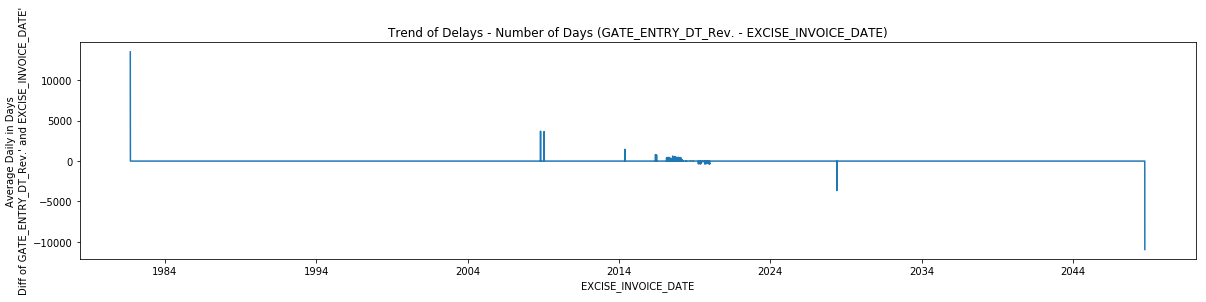

In [33]:
plt.figure(figsize=(20,4))
plt.plot(daily_delay)
plt.xlabel("EXCISE_INVOICE_DATE")
plt.ylabel("Average Daily in Days\nDiff of GATE_ENTRY_DT_Rev.' and EXCISE_INVOICE_DATE'")
plt.title("Trend of Delays - Number of Days (GATE_ENTRY_DT_Rev. - EXCISE_INVOICE_DATE)")

Text(0.5,1,'Trend of Delays - Number of Days (GATE_ENTRY_DT_Rev. - EXCISE_INVOICE_DATE)')

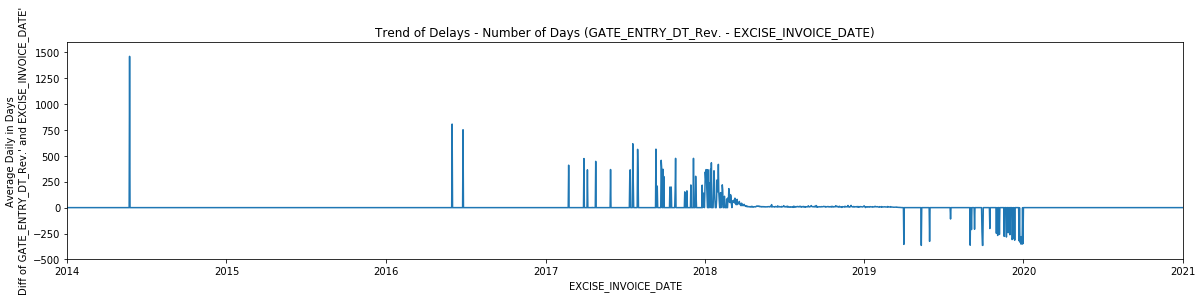

In [39]:
#zoom in
plt.figure(figsize=(20,4))
plt.plot(daily_delay)
plt.xlim((pd.Timestamp("01-01-2014"), pd.Timestamp("01-01-2021")))
plt.ylim((-500, 1600))
plt.xlabel("EXCISE_INVOICE_DATE")
plt.ylabel("Average Daily in Days\nDiff of GATE_ENTRY_DT_Rev.' and EXCISE_INVOICE_DATE'")
plt.title("Trend of Delays - Number of Days (GATE_ENTRY_DT_Rev. - EXCISE_INVOICE_DATE)")

### 11. Duplicate GRN for same invoices (Refer Column B “GRN Date” and Column W “EXCISE_INVOICE_DATE” and Column N “SUPPLIER”)

In [35]:
cols = ["GRN Date", "EXCISE_INVOICE_DATE", "SUPPLIER"]
df11_bool = df[cols].duplicated(keep=False)
df11 = df[df11_bool].groupby(cols).apply(lambda x: len(x))
print(df11.shape)
df11.head(10)

(13032,)


GRN Date    EXCISE_INVOICE_DATE  SUPPLIER                            
2018-04-04  2018-03-07           NATESAN SYNCHROCONES PRIVATE LIMITED    2
            2018-03-08           NATESAN SYNCHROCONES PRIVATE LIMITED    2
            2018-03-20           GRAVITY DIE CASTERS                     3
            2018-03-23           GRAVITY DIE CASTERS                     3
            2018-03-26           KADVANI FORGE LIMITED                   3
            2018-03-27           GRAVITY DIE CASTERS                     3
            2018-03-29           CIRCLIPS TECHNOLOGIE PRIVATE LIMITED    2
                                 KADVANI FORGE LIMITED                   3
            2018-03-30           CIRCLIPS TECHNOLOGIE PRIVATE LIMITED    2
                                 UNITHERM ENGINEERS LIMITED              2
dtype: int64

In [36]:
df11.describe()

count    13032.000000
mean         3.921117
std          4.833351
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max        151.000000
dtype: float64

In [37]:
#top 20 suppliers with the most duplicate invoices
df11.sort_values(ascending=False).head(20)

GRN Date    EXCISE_INVOICE_DATE  SUPPLIER                       
2018-07-27  2018-07-27           BIOSAFE SOLUTIONS                  151
2018-04-29  2018-04-16           ISUZU MOTORS LIMITED                81
2018-08-21  2018-08-18           BIOSAFE SOLUTIONS                   78
2018-07-28  2018-07-28           BIOSAFE SOLUTIONS                   78
2018-05-29  2018-05-29           TRIAD TECHNOMET PRIVATE LIMITED     72
2018-04-29  2018-04-29           TRIAD TECHNOMET PRIVATE LIMITED     71
2018-05-30  2018-04-16           ISUZU MOTORS LIMITED                70
2018-06-19  2018-06-19           TRIAD TECHNOMET PRIVATE LIMITED     67
2018-09-26  2018-09-25           BIOSAFE SOLUTIONS                   67
2018-07-16  2018-07-15           TRIAD TECHNOMET PRIVATE LIMITED     64
2018-07-30  2018-07-30           TRIAD TECHNOMET PRIVATE LIMITED     64
2018-06-12  2018-06-12           KULALI ENTERPRISES                  63
2018-07-10  2018-07-10           TRIAD TECHNOMET PRIVATE LIMITED     63

### 12. Blanket and Standard PO created and approved on Same date to same supplier for same item (Refer Column D “ITEM” and Column AB “PO_TYPE” and Column N “SUPPLIER” and Column AC “PO Creation Date”)

In [38]:
df12 = df[(df["PO approval Date"] == df["PO Creation Date"])]
df12 = \
df12.groupby(["PO Creation Date", "PO approval Date", "ITEM", "SUPPLIER", "PO_TYPE"])\
    .apply(lambda x: x["PO_NUM"].values).unstack()

df12_bool = df12.notnull().all(axis=1)
df12[df12_bool]

,,,PO_TYPE,BLANKET,STANDARD
PO Creation Date,PO approval Date,ITEM,SUPPLIER,,
